# Analysing topic model evaluation metrics

In [1]:
%load_ext autoreload
%autoreload 2

import json

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn import manifold
from sklearn.preprocessing import MinMaxScaler

from itertools import combinations
from itertools import chain

metric_names = ['c_npmi', 'c_uci', 'c_v', 'c_w2v', 'perplexity', 'u_mass']
param_names = ['alpha', 'beta', 'num_topics']

### Load saved metrics

In [2]:
with open('../data/lee-metrics.json') as f:
    models = json.load(f)

df = pd.DataFrame(models)
df.head()

,alpha,beta,c_npmi,c_uci,c_v,c_w2v,modelId,num_topics,perplexity,u_mass
0,0.01,0.01,-0.003759,-1.836443,0.449097,0.998317,0.01-0.01-5,5,-6.246609,-2.393090
1,0.01,0.01,-0.037455,-2.854046,0.470005,0.998850,0.01-0.01-10,10,-6.302226,-2.233028
2,0.01,0.01,-0.059600,-3.329506,0.433467,0.998933,0.01-0.01-15,15,-6.363658,-2.439774
3,0.01,0.01,-0.075871,-3.677816,0.412369,0.998767,0.01-0.01-20,20,-6.402373,-2.509307
4,0.01,0.10,-0.008113,-2.012630,0.449335,0.998327,0.01-0.1-5,5,-6.038808,-2.413199


### Add ranks of absolute metric values

In [3]:
metric_names_with_ranks = [m + '-rank' for m in metric_names]
df[metric_names_with_ranks] = df[metric_names].rank(ascending=False)
df['mean_rank'] = df[metric_names_with_ranks].mean(axis=1)
df['best_rank'] = df[metric_names_with_ranks].min(axis=1)
df.head()

,alpha,beta,c_npmi,c_uci,c_v,c_w2v,modelId,num_topics,perplexity,u_mass,c_npmi-rank,c_uci-rank,c_v-rank,c_w2v-rank,perplexity-rank,u_mass-rank,mean_rank,best_rank
0,0.01,0.01,-0.003759,-1.836443,0.449097,0.998317,0.01-0.01-5,5,-6.246609,-2.393090,7.0,19.0,23.0,52.0,31.0,33.0,27.500000,7.0
1,0.01,0.01,-0.037455,-2.854046,0.470005,0.998850,0.01-0.01-10,10,-6.302226,-2.233028,25.0,33.0,6.0,25.0,41.0,24.0,25.666667,6.0
2,0.01,0.01,-0.059600,-3.329506,0.433467,0.998933,0.01-0.01-15,15,-6.363658,-2.439774,41.0,41.0,29.0,14.0,45.0,45.0,35.833333,14.0
3,0.01,0.01,-0.075871,-3.677816,0.412369,0.998767,0.01-0.01-20,20,-6.402373,-2.509307,48.0,49.0,39.0,34.0,47.0,51.0,44.666667,34.0
4,0.01,0.10,-0.008113,-2.012630,0.449335,0.998327,0.01-0.1-5,5,-6.038808,-2.413199,11.0,24.5,21.5,50.0,9.0,41.0,26.166667,9.0


### Project metrics into 2D space, color with mean rank

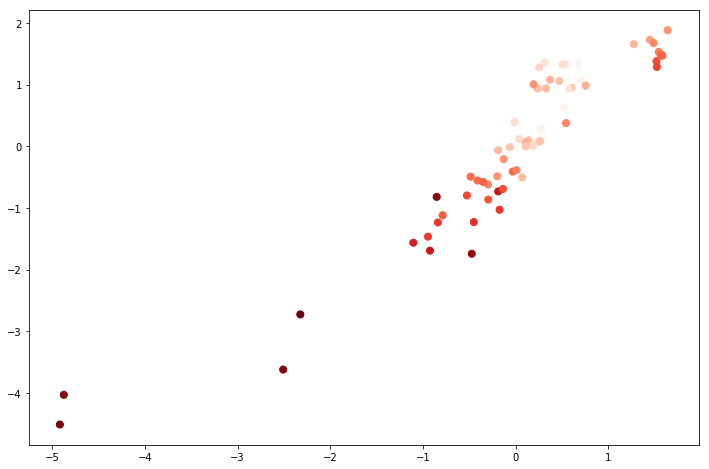

In [4]:
coords = manifold.MDS(random_state=0).fit_transform(df[metric_names].values)
plt.figure(figsize=(12,8))
plt.scatter(coords[:,0], coords[:,1], s=50, c=df['mean_rank'], cmap='Reds')

In [5]:
df['coords'] = [tuple(c) for c in coords]
df.head()

,alpha,beta,c_npmi,c_uci,c_v,c_w2v,modelId,num_topics,perplexity,u_mass,c_npmi-rank,c_uci-rank,c_v-rank,c_w2v-rank,perplexity-rank,u_mass-rank,mean_rank,best_rank,coords
0,0.01,0.01,-0.003759,-1.836443,0.449097,0.998317,0.01-0.01-5,5,-6.246609,-2.393090,7.0,19.0,23.0,52.0,31.0,33.0,27.500000,7.0,"(0.3720094116386932, 1.081315516485146)"
1,0.01,0.01,-0.037455,-2.854046,0.470005,0.998850,0.01-0.01-10,10,-6.302226,-2.233028,25.0,33.0,6.0,25.0,41.0,24.0,25.666667,6.0,"(0.14137494692935068, 0.09896665164380473)"
2,0.01,0.01,-0.059600,-3.329506,0.433467,0.998933,0.01-0.01-15,15,-6.363658,-2.439774,41.0,41.0,29.0,14.0,45.0,45.0,35.833333,14.0,"(-0.0309442095498746, -0.41066023082349734)"
3,0.01,0.01,-0.075871,-3.677816,0.412369,0.998767,0.01-0.01-20,20,-6.402373,-2.509307,48.0,49.0,39.0,34.0,47.0,51.0,44.666667,34.0,"(-0.18770663843033764, -0.732876134906908)"
4,0.01,0.10,-0.008113,-2.012630,0.449335,0.998327,0.01-0.1-5,5,-6.038808,-2.413199,11.0,24.5,21.5,50.0,9.0,41.0,26.166667,9.0,"(0.2417932137159731, 0.9375419394649211)"


### Look at Spearman correlation between the metrics

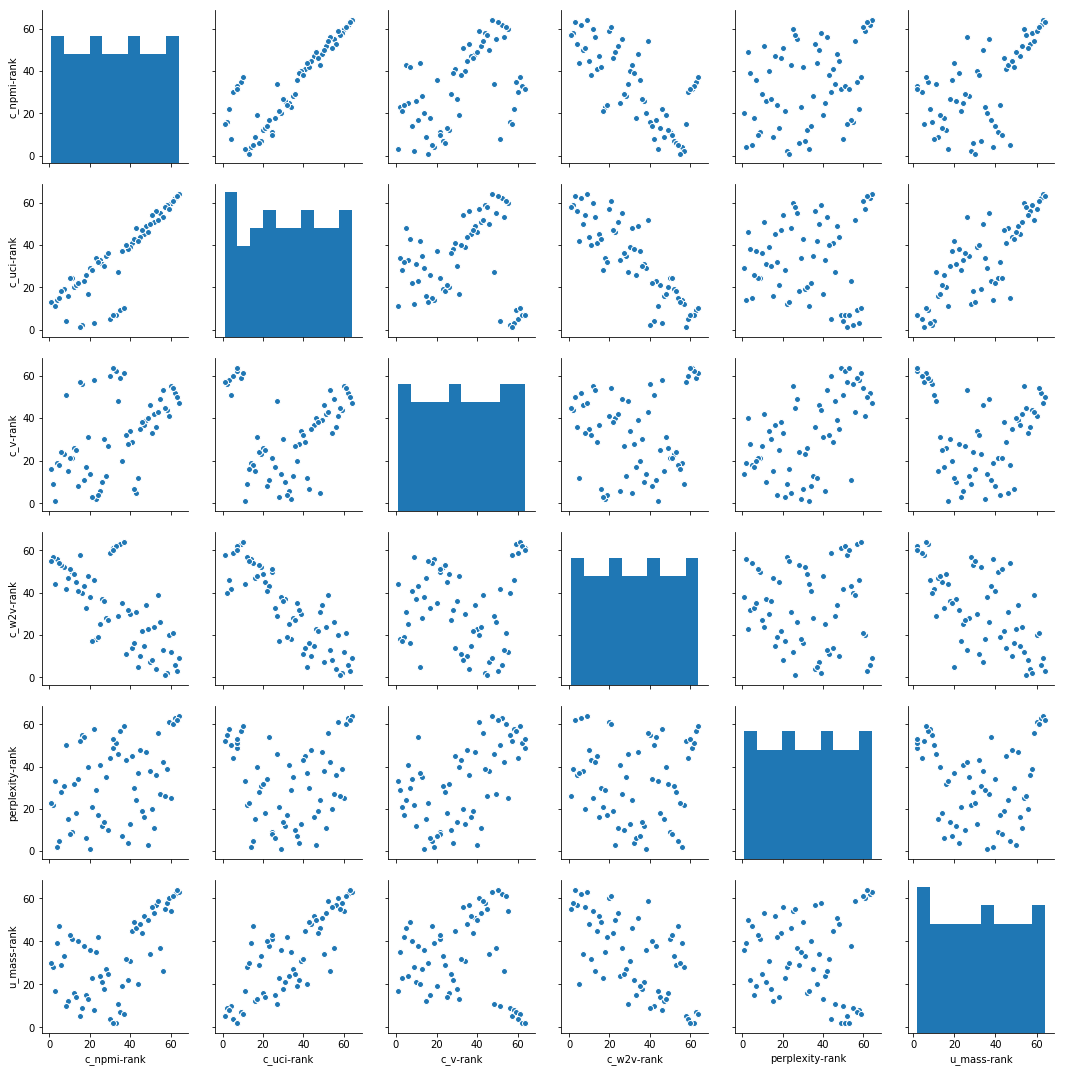

In [6]:
sns.pairplot(df[metric_names_with_ranks])

Some are correlated, most are not. Let's look at the values.

In [7]:
df[metric_names].corr('spearman')

,c_npmi,c_uci,c_v,c_w2v,perplexity,u_mass
c_npmi,1.000000,0.842938,0.480465,-0.717705,0.328804,0.566836
c_uci,0.842938,1.000000,0.040365,-0.863946,0.011470,0.820094
c_v,0.480465,0.040365,1.000000,0.045285,0.564047,-0.102159
c_w2v,-0.717705,-0.863946,0.045285,1.000000,-0.042628,-0.653372
perplexity,0.328804,0.011470,0.564047,-0.042628,1.000000,-0.043363
u_mass,0.566836,0.820094,-0.102159,-0.653372,-0.043363,1.000000


### Subgroup correlation analysis

In [8]:
def compute_corr_group(df, param):
    '''
    Group the dataframe by the given param and perform correlation.
    Return an array of objects:
    - condition: [(param, value)]
    - variables: (var1, var2)
    - coeff: correlation coefficient
    - diff: difference between the coefficient of the entire dataset and the group
    '''
    results = []
    gloabl_corr_df = df[metric_names].corr('spearman')
    for k, g in df.groupby(param):
        corr_df = g[metric_names].corr('spearman')
        
        for var1, var2 in combinations(metric_names, 2):
            results.append({ 
                'condition': [(param, float(k))],
                'variables': (var1, var2),
                'coeff': corr_df[var1][var2],
                'diff': corr_df[var1][var2] - gloabl_corr_df[var1][var2]
            })

    return results

In [9]:
def compute_overall_corr(df):
    results = []
    corr_df = df[metric_names].corr('spearman')

    for var1, var2 in combinations(metric_names, 2):
        results.append({ 
            'condition': None,
            'variables': (var1, var2),
            'coeff': corr_df[var1][var2],
            'diff': 0
        })

    return results

In [10]:
all_corrs = list(chain.from_iterable([compute_corr_group(df, param) for param in param_names]))
all_corrs = list(chain.from_iterable([all_corrs, compute_overall_corr(df)]))
corr_df = pd.DataFrame(all_corrs)
corr_df.head()

,coeff,condition,diff,variables
0,0.982353,"[(alpha, 0.01)]",0.139415,"(c_npmi, c_uci)"
1,0.729412,"[(alpha, 0.01)]",0.248947,"(c_npmi, c_v)"
2,-0.817647,"[(alpha, 0.01)]",-0.099942,"(c_npmi, c_w2v)"
3,0.305882,"[(alpha, 0.01)]",-0.022922,"(c_npmi, perplexity)"
4,0.608824,"[(alpha, 0.01)]",0.041987,"(c_npmi, u_mass)"


Which correlation value is the highest?

In [11]:
corr_df.sort_values('coeff', ascending=False).head(10)

,coeff,condition,diff,variables
15,1.000000,"[(alpha, 0.1)]",0.157062,"(c_npmi, c_uci)"
60,0.994118,"[(beta, 0.01)]",0.151180,"(c_npmi, c_uci)"
0,0.982353,"[(alpha, 0.01)]",0.139415,"(c_npmi, c_uci)"
165,0.982353,"[(num_topics, 20.0)]",0.139415,"(c_npmi, c_uci)"
150,0.979412,"[(num_topics, 15.0)]",0.136474,"(c_npmi, c_uci)"
75,0.958058,"[(beta, 0.1)]",0.115120,"(c_npmi, c_uci)"
53,0.943787,"[(alpha, 10.0)]",0.123693,"(c_uci, u_mass)"
158,0.941176,"[(num_topics, 15.0)]",0.121083,"(c_uci, u_mass)"
38,0.935294,"[(alpha, 1.0)]",0.115200,"(c_uci, u_mass)"
48,0.919794,"[(alpha, 10.0)]",0.590990,"(c_npmi, perplexity)"


Which correlation increasing the most from the global one?

In [12]:
corr_df.sort_values('diff', ascending=False).head(10)

,coeff,condition,diff,variables
71,0.814706,"[(beta, 0.01)]",0.916865,"(c_v, u_mass)"
65,0.852941,"[(beta, 0.01)]",0.812576,"(c_uci, c_v)"
80,0.846834,"[(beta, 0.1)]",0.806469,"(c_uci, c_v)"
86,0.685799,"[(beta, 0.1)]",0.787958,"(c_v, u_mass)"
59,0.705018,"[(alpha, 10.0)]",0.748381,"(perplexity, u_mass)"
144,0.785294,"[(num_topics, 10.0)]",0.740009,"(c_v, c_w2v)"
74,0.691176,"[(beta, 0.01)]",0.734539,"(perplexity, u_mass)"
52,0.737466,"[(alpha, 10.0)]",0.725996,"(c_uci, perplexity)"
89,0.647059,"[(beta, 0.1)]",0.690422,"(perplexity, u_mass)"
67,0.700000,"[(beta, 0.01)]",0.688530,"(c_uci, perplexity)"


### Subgroup mean ranking

In [13]:
def compute_group_rank(df, params):
    '''
    Group the dataframe by the given params and compute the average rank of a group's elements.
    Return an array of objects:
    - condition: [(param, value)]
    - mean_rank, best_rank, individual metrics: the average rank
    '''
    results = []
    all_metrics = metric_names_with_ranks + ['mean_rank', 'best_rank']
    
    for k, g in df.groupby(params):
        result = { 'condition': list(zip(params, [float(x) for x in k])) if type(params) == tuple else [(params, float(k))] }

        for m in all_metrics:
            result[m.replace('-rank', '')] = g[m].mean()
        
        results.append(result)

    return results

In [20]:
single_groups = list(chain.from_iterable([compute_group_rank(df, param) for param in param_names]))
double_groups = list(chain.from_iterable([compute_group_rank(df, param) for param in combinations(param_names, 2)]))
all_ranks = list(chain.from_iterable([single_groups, double_groups]))
rank_df = pd.DataFrame(all_ranks)
rank_df

,best_rank,c_npmi,c_uci,c_v,c_w2v,condition,mean_rank,perplexity,u_mass
0,10.1875,32.31250,36.46875,26.15625,33.2500,"[(alpha, 0.01)]",31.072917,20.1250,38.1250
1,9.2500,30.56250,35.15625,27.46875,29.6875,"[(alpha, 0.1)]",29.916667,22.9375,33.6875
2,6.0000,29.00000,29.56250,30.56250,26.2500,"[(alpha, 1.0)]",29.416667,33.6875,27.4375
3,8.8750,38.12500,28.81250,45.81250,40.8125,"[(alpha, 10.0)]",39.593750,53.2500,30.7500
4,10.4375,36.62500,40.87500,28.75000,23.6250,"[(beta, 0.01)]",35.958333,43.5000,42.3750
5,12.1875,35.81250,40.00000,30.06250,27.8125,"[(beta, 0.1)]",33.322917,24.6250,41.6250
6,5.1250,26.31250,25.00000,28.37500,38.8750,"[(beta, 1.0)]",27.479167,22.4375,23.8750
7,6.5625,31.25000,24.12500,42.81250,39.6875,"[(beta, 10.0)]",33.239583,39.4375,22.1250
8,6.9375,10.18750,17.18750,20.56250,50.2500,"[(num_topics, 5.0)]",25.135417,24.8750,27.7500
9,8.3125,29.15625,31.00000,22.71875,31.8125,"[(num_topics, 10.0)]",29.250000,30.8750,29.9375


In [14]:
# single_groups = list(chain.from_iterable([compute_group_rank(df, param) for param in param_names]))
# double_groups = list(chain.from_iterable([compute_group_rank(df, param) for param in combinations(param_names, 2)]))
# triple_groups = list(chain.from_iterable([compute_group_rank(df, param) for param in combinations(param_names, 3)]))
# all_ranks = list(chain.from_iterable([single_groups, double_groups, triple_groups]))
# rank_df = pd.DataFrame(all_ranks)
# rank_df.head()

,best_rank,c_npmi,c_uci,c_v,c_w2v,condition,mean_rank,perplexity,u_mass
0,10.1875,32.3125,36.46875,26.15625,33.2500,"[(alpha, 0.01)]",31.072917,20.1250,38.1250
1,9.2500,30.5625,35.15625,27.46875,29.6875,"[(alpha, 0.1)]",29.916667,22.9375,33.6875
2,6.0000,29.0000,29.56250,30.56250,26.2500,"[(alpha, 1.0)]",29.416667,33.6875,27.4375
3,8.8750,38.1250,28.81250,45.81250,40.8125,"[(alpha, 10.0)]",39.593750,53.2500,30.7500
4,10.4375,36.6250,40.87500,28.75000,23.6250,"[(beta, 0.01)]",35.958333,43.5000,42.3750


### Export data

In [21]:
with open('../data/lee-analysis-metrics.json', 'w') as f:
    data = {
        'metrics': df.to_dict('records'),
        'correlations': corr_df.to_dict('records'),
        'ranks': rank_df.to_dict('records')
    }
    
    json.dump(data, f)